In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot: >

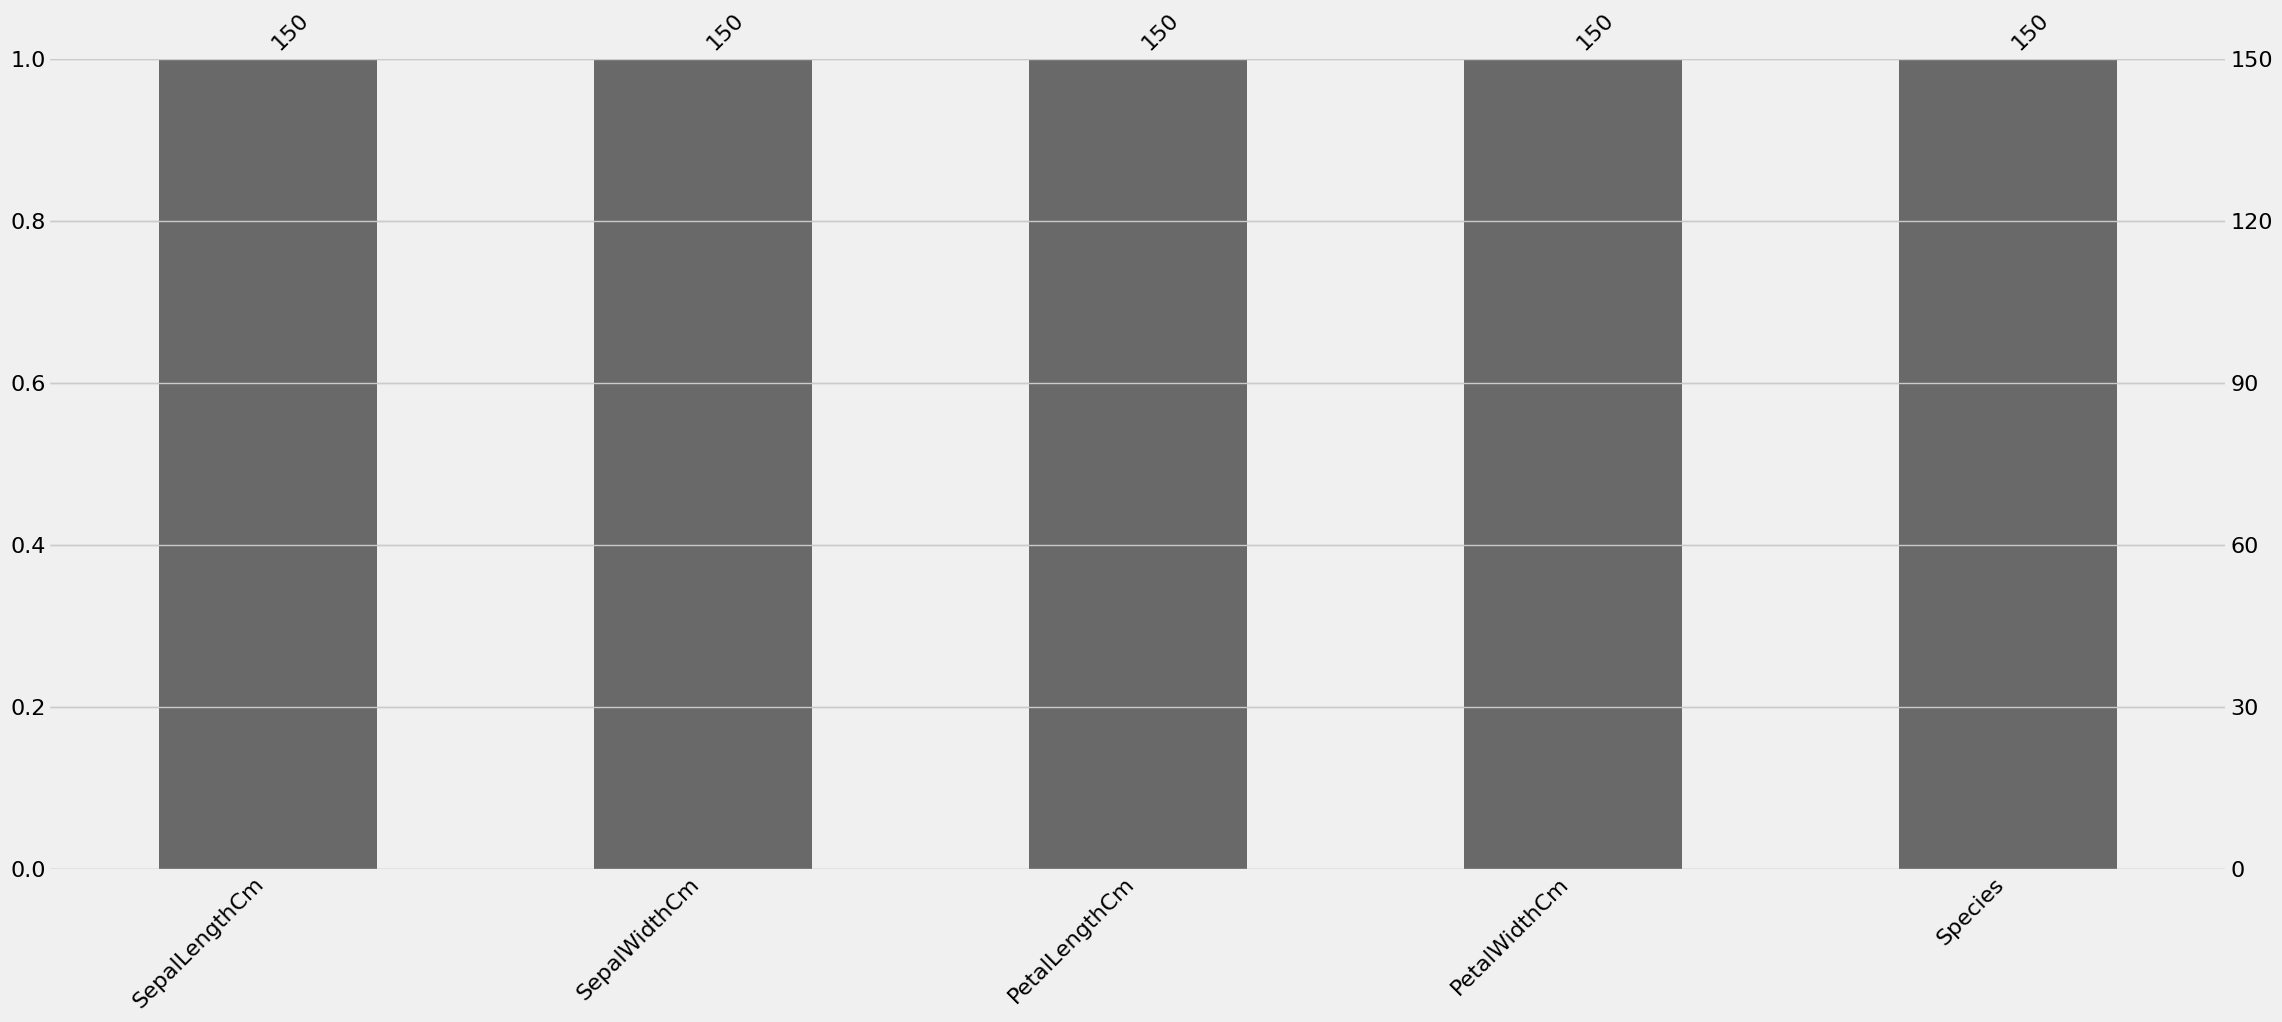

In [13]:
import missingno as msno
msno.bar(df)


In [14]:
df.drop_duplicates(inplace=True)

<AxesSubplot: xlabel='Species', ylabel='SepalLengthCm'>

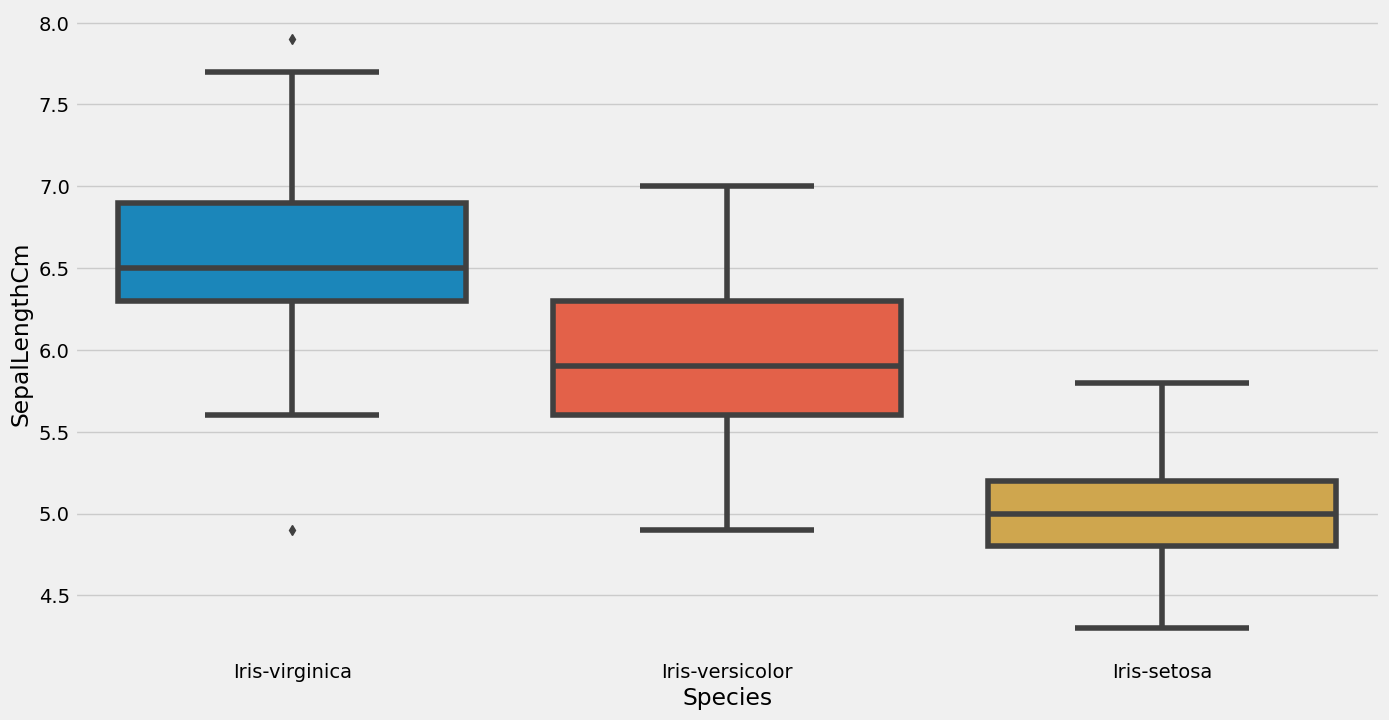

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<AxesSubplot: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

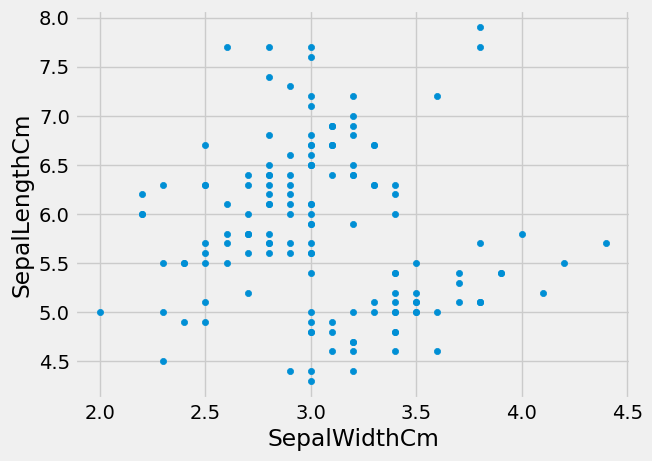

In [16]:

df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

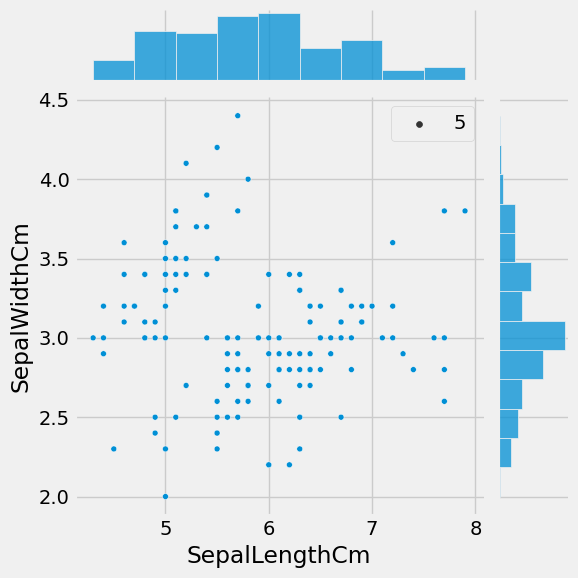

In [17]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

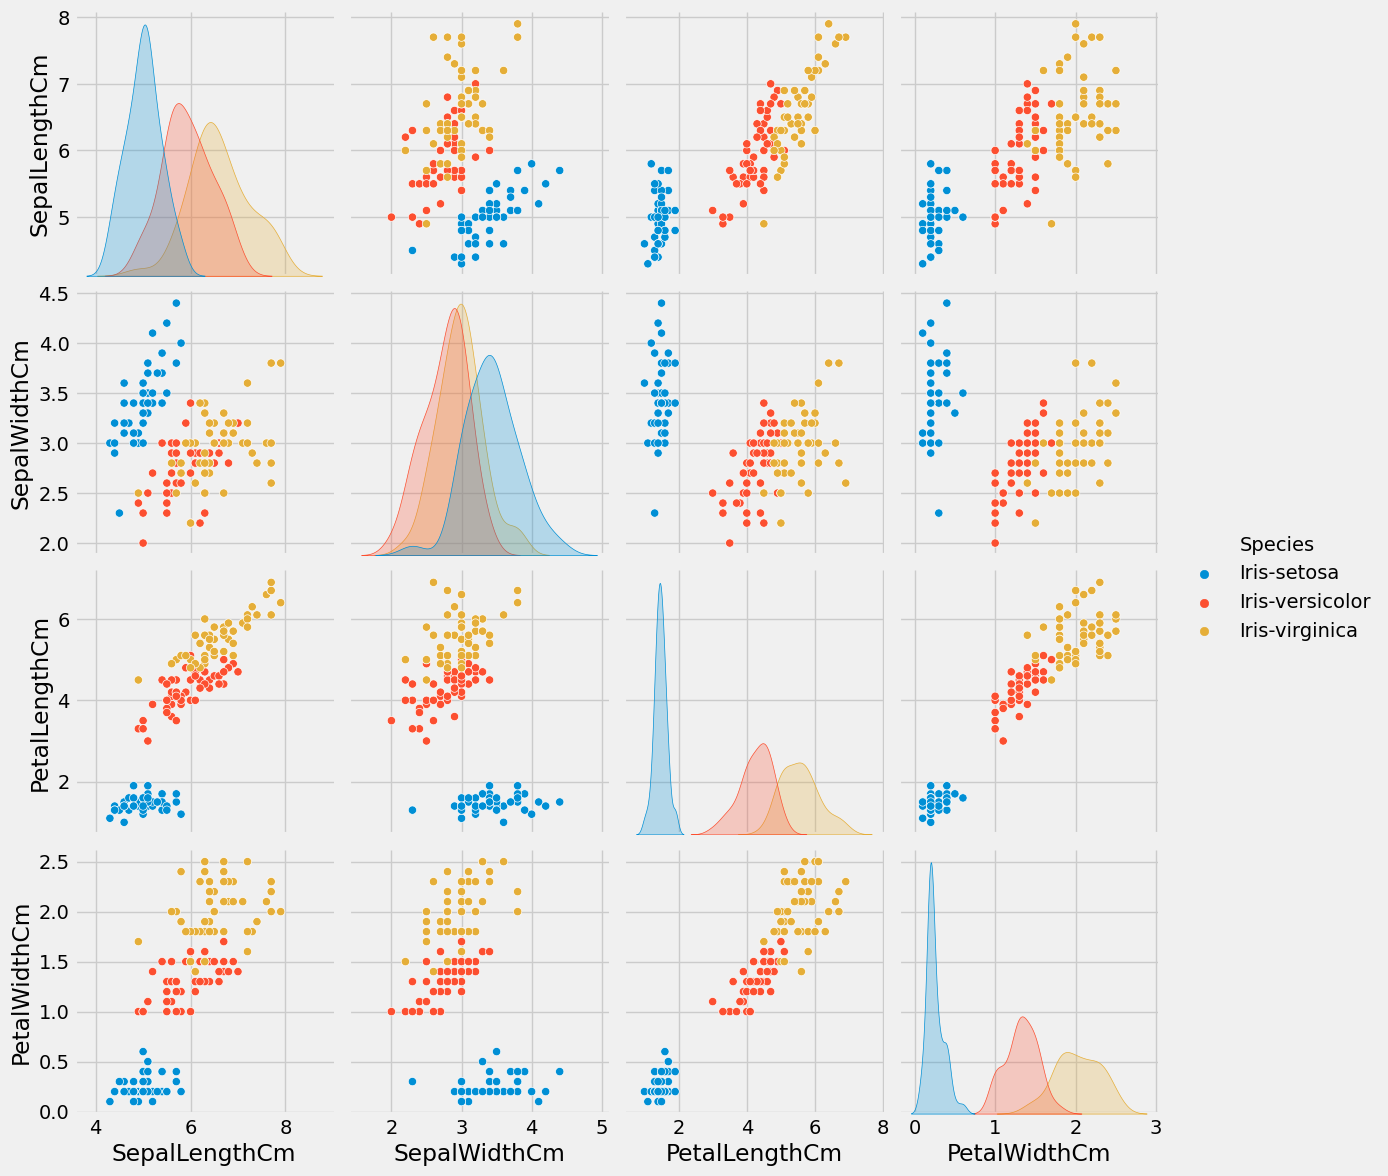

In [18]:
sns.pairplot(df, hue="Species", size=3)

array([[<AxesSubplot: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

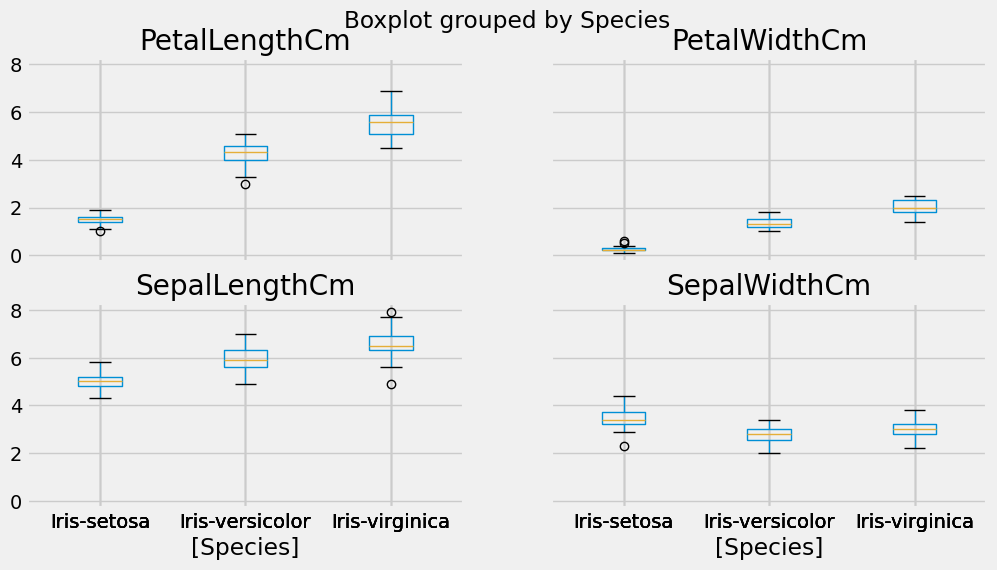

In [19]:
df.boxplot(by="Species", figsize=(12, 6))

<AxesSubplot: >

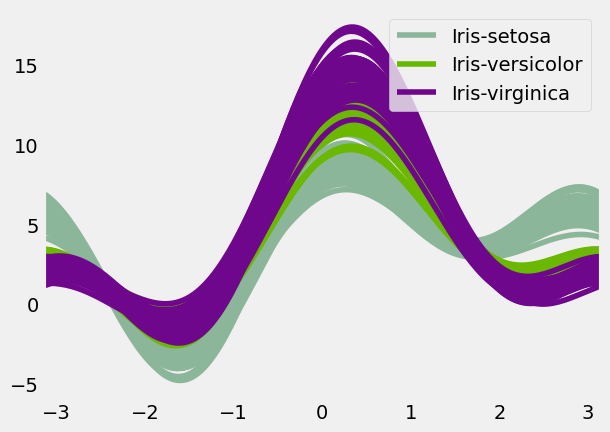

In [20]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

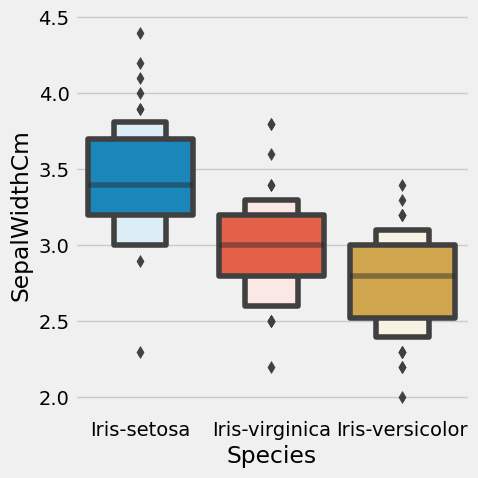

In [21]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<AxesSubplot: xlabel='Species', ylabel='SepalWidthCm'>

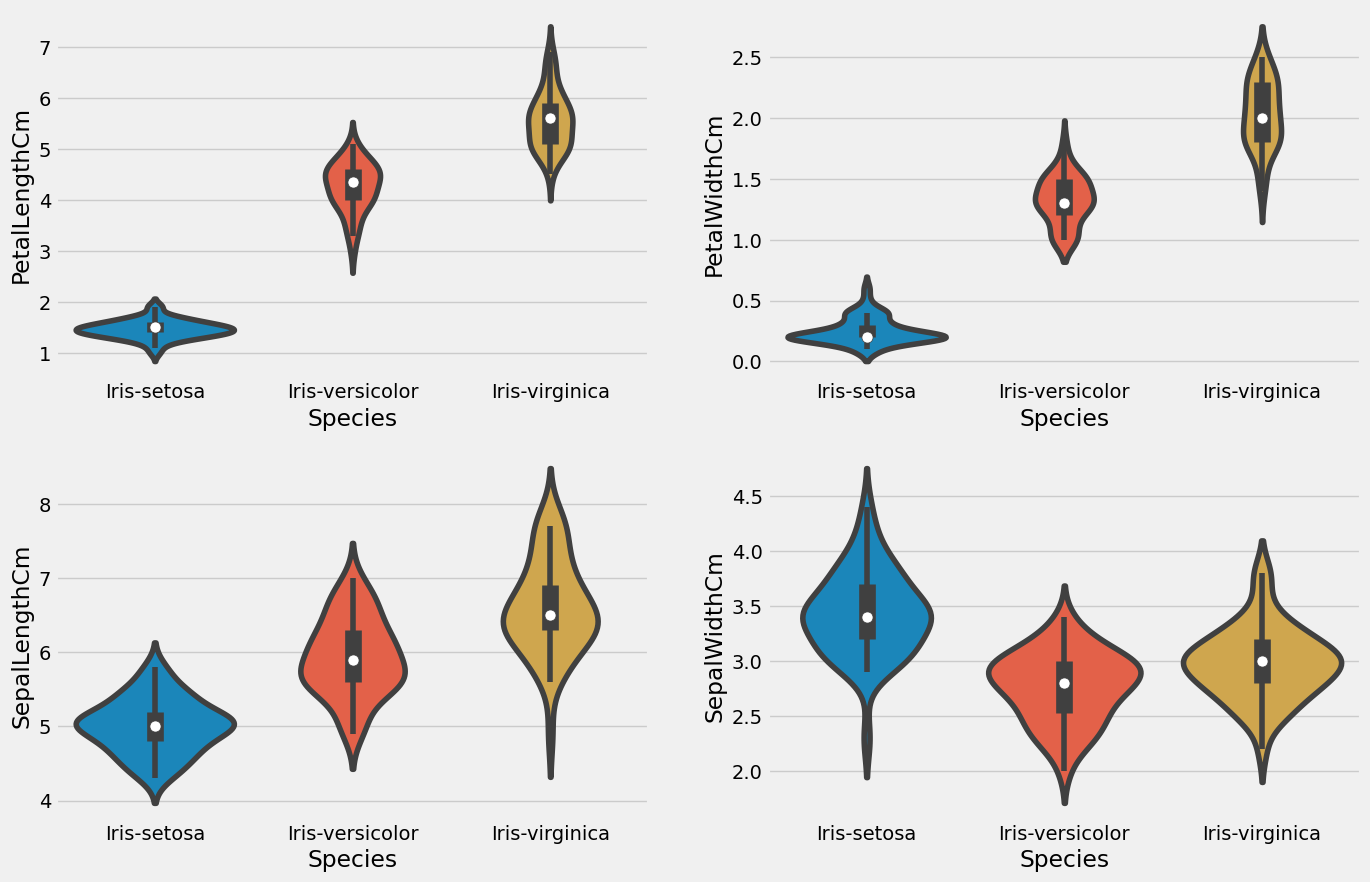

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [23]:
X=df.drop('Species',axis=1)
y=df['Species']

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [25]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [27]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 92ms/step - loss: 1.1564 - accuracy: 0.3333 - val_loss: 1.0858 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 18ms/step - loss: 1.0443 - accuracy: 0.3333 - val_loss: 0.9812 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 19ms/step - loss: 0.9569 - accuracy: 0.3333 - val_loss: 0.9025 - val_accuracy: 0.3556
Epoch 4/45
4/4 [==============================] - 0s 25ms/step - loss: 0.8880 - accuracy: 0.5490 - val_loss: 0.8500 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 19ms/step - loss: 0.8454 - accuracy: 0.6667 - val_loss: 0.8158 - val_accuracy: 0.8667
Epoch 6/45
4/4 [==============================] - 0s 20ms/step - loss: 0.8171 - accuracy: 0.8922 - val_loss: 0.7882 - val_accuracy: 0.7556
Epoch 7/45
4/4 [==============================] - 0s 22ms/step - loss: 0.7927 - accuracy: 0.7157 - val_loss: 0.7623 - val_accuracy: 0.6667
Epoch 8/45
4/4 [===========

In [30]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3978 - accuracy: 0.9778


[0.3977963626384735, 0.9777777791023254]

In [31]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 97ms/step
[[0.00469504 0.3869901  0.60831493]
 [0.00376945 0.37691817 0.6193124 ]
 [0.0575881  0.5992882  0.34312364]
 [0.03406564 0.55686224 0.4090722 ]
 [0.93270737 0.05938534 0.00790733]
 [0.03249158 0.5931512  0.37435728]
 [0.00449487 0.32170233 0.67380285]
 [0.00496134 0.33993953 0.65509915]
 [0.9286898  0.06346441 0.00784576]
 [0.00959856 0.45479023 0.5356112 ]]


In [32]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [33]:
history.history['accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.5490196347236633,
 0.6666666865348816,
 0.8921568393707275,
 0.7156862616539001,
 0.7352941036224365,
 0.8823529481887817,
 0.7450980544090271,
 0.6666666865348816,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6666666865348816,
 0.7549019455909729,
 0.8921568393707275,
 0.8529411554336548,
 0.7549019455909729,
 0.6960784196853638,
 0.7058823704719543,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.7254902124404907,
 0.813725471496582,
 0.9313725233078003,
 0.9509803652763367,
 0.9411764740943909,
 0.9509803652763367,
 0.9117646813392639,
 0.8039215803146362,
 0.7058823704719543,
 0.7058823704719543,
 0.7843137383460999,
 0.8627451062202454,
 0.9509803652763367,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.970588207244873]

In [34]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.35555556416511536,
 0.6666666865348816,
 0.8666666746139526,
 0.7555555701255798,
 0.6666666865348816,
 0.9333333373069763,
 0.7555555701255798,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6888889074325562,
 0.8222222328186035,
 0.8222222328186035,
 0.7555555701255798,
 0.6666666865348816,
 0.6888889074325562,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.800000011920929,
 0.8666666746139526,
 0.9777777791023254,
 0.8888888955116272,
 0.9777777791023254,
 0.9555555582046509,
 0.7777777910232544,
 0.7555555701255798,
 0.7111111283302307,
 0.7777777910232544,
 0.800000011920929,
 0.8666666746139526,
 0.9555555582046509,
 0.9333333373069763,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254]

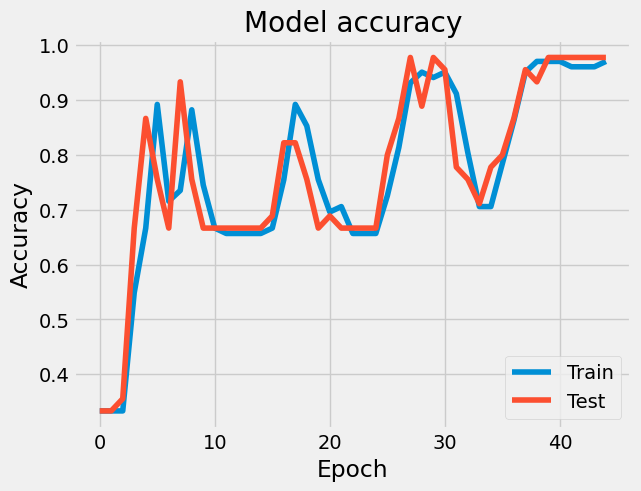

In [35]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()